<a href="https://colab.research.google.com/github/SachinYallapurkar/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title : Netflix Movies and TV shows**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

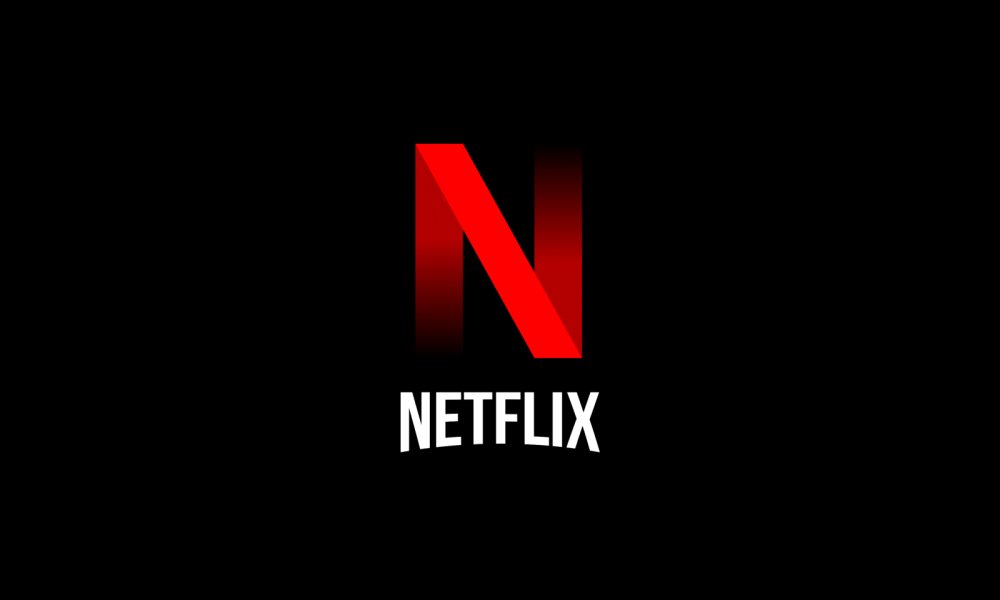

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

#First and foremost import all necessary libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as pandas
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold
from sklearn.decomposition import PCA

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings("ignore")


In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
if not os.path.exists("images"):
  os.mkdir("images")

In [ ]:
pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00


In [ ]:
#mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the dataset
df=pd.read_csv("/content/drive/MyDrive/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#last 5 observations
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**To get the basic information about data**

In [ ]:
#Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Data Summary 
> Datset has **7787 rows and 12 features**.

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

**create a backup**

In [ ]:
df_backup=df.copy()

**Handling Duplicates**

In [ ]:
df.duplicated().sum()

0

No duplicates are present

**Null values Handling**

In [ ]:
#column-wise null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#percentage of null values present
for column in df.columns:
  percent=df[column].isnull().sum()  / len(df)*100
  if percent > 0:
   print(f"Percentage of null values present in column {column} is {percent}")

Percentage of null values present in column director is 30.679337357133683
Percentage of null values present in column cast is 9.220495697958135
Percentage of null values present in column country is 6.51085141903172
Percentage of null values present in column date_added is 0.1284191601386927
Percentage of null values present in column rating is 0.08989341209708489


> Out of 12 features, 5 features have null values.

> Columns having nul vallues : **director ,cast,country and date_added**

The percentage of null values present in features "date_added" and "rating" are 0.21% and 0.09% respectively.As this is very less compared to whole dataset we will be dropping these null values.

In [ ]:
#remove null value observation of featue "date_added"
df.dropna(subset=["date_added"],inplace=True)

In [ ]:
#remove null value observation of featue "rating"
df.dropna(subset=["rating"],inplace=True)

#**Exploratory Data Analysis**

In [ ]:
#statistical inforation about datset
df.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**Observations**:
> Netflix has 25% of its movies and Tv shows released in 2013.

> Netflix has movies and TV shows starting from release date 1925 till 2021.

>75% of Netflix content has been released after 2013.It means that netflix has very less proportion of old movies and TV shows.

**Adding feature using existing feature**

Feature "**date_added**" is object datatype.We will convert it to seperate day,month and year for better analysis.

In [ ]:
#create new features out of "date_added"

#first convert date_added to datetime datatype
df["date_added"]=pd.to_datetime(df["date_added"])

#compute day,month and year
df["day_added"]=df["date_added"].dt.day
df["year_added"]=df["date_added"].dt.year
df["month_added"]=df["date_added"].dt.month

In [ ]:
#dataframe with features newly added
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19,2020,10
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,2019,3
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25,2020,9
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,31,2020,10


**To visulaize the proportion of Movies and TV shows**

**Based on content**

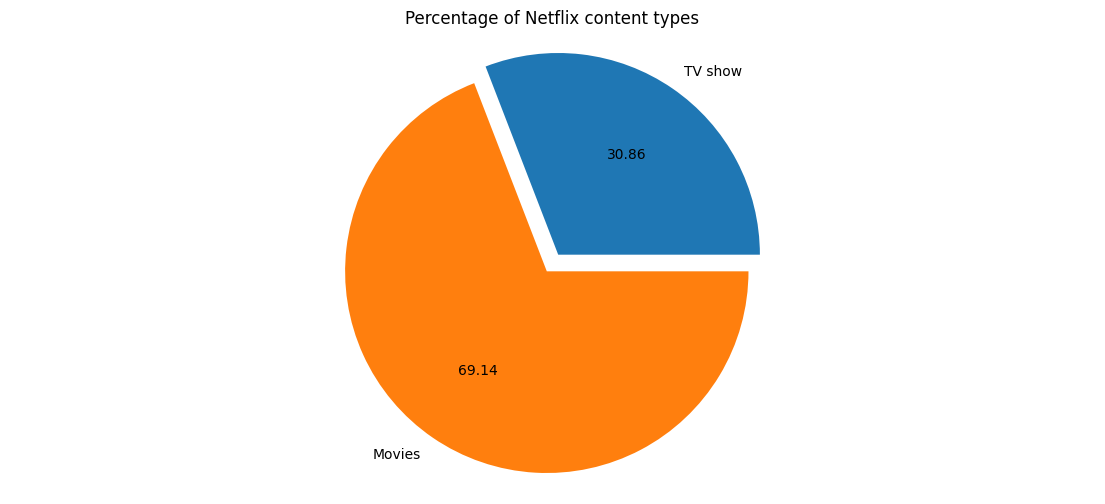

In [ ]:
#create a piechart
plt.figure(figsize=(14,6))
plt.pie(df["type"].value_counts().sort_values(),
        labels=["TV show","Movies"],
        explode=[0,0.1],
        autopct="%1.2f")


plt.title("Percentage of Netflix content types")
plt.axis("equal")
plt.show()

**Observation**
> Number of movies is high in Netflix compared to TV shows.

> About 70% of uploads are movies and remaining 30% is TV shows.

Text(0.5, 1.0, 'Movies/TV Shows Added per Year')

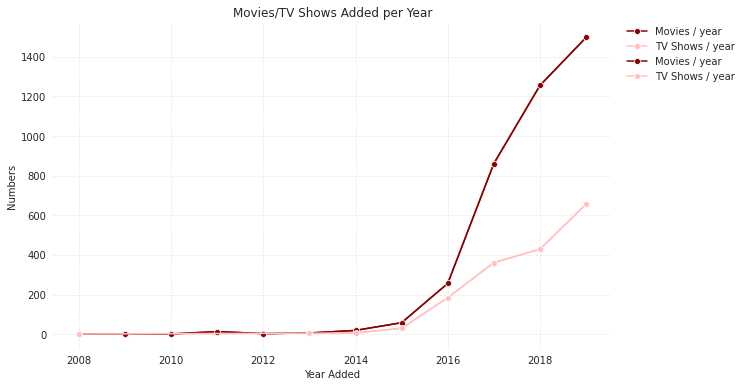

In [ ]:
# Create a list of years when content was added
years = list(range(2008,2020,1))
# Seperate Rows having only movies as content
movie_rows=df.loc[df["type"] == "Movie"]
# Seperate Rows having only TV Shows as content
tv_rows=df.loc[df["type"]=="TV Show"]

movies_counts = movie_rows.year_added.value_counts()
tv_counts = tv_rows.year_added.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]
     

# Create a line plot
plt.figure(figsize=(10,6))

sns.lineplot(data=movies, color="#8B0000",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="#FFC1C1",  label="TV Shows / year",marker='o')

# remove the frame
sns.lineplot(data=movies, color="#8B0000",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="#FFC1C1",  label="TV Shows / year",marker='o')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.xlabel("Year Added")
plt.ylabel("Numbers")
plt.title('Movies/TV Shows Added per Year')
     

Movies and TV shows have significantly increased after 2016.

Number of movies added is much higher compared to TV shows added.

#Ratings

**For Movies:**
* G: Kids
* PG: Older Kids (7+)
* PG-13: Teens (13+)
* NC-17, NR, R, Unrated: Adults (18+)


**For TV Shows:**
* TV-G, TV-Y: Kids
* TV-Y7/FV/PG: Older Kids (7+)
* TV-14: Young Adults (16+)
* TV-MA: Adults (18+)


Text(0.5, 1.0, 'Top content Ratings')

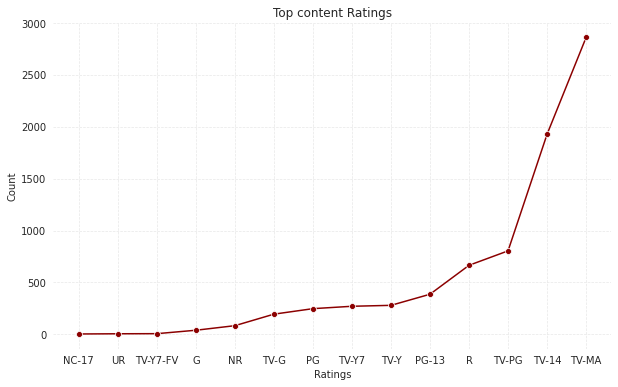

In [ ]:
movie_ratings = df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=True)

plt.figure(figsize=(10,6))

ax=sns.lineplot( x='rating',y='count',data=movie_ratings,color="#8B0000",marker='o')

# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    plt.text(65+p.get_x()+p.get_width(),p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=True, labelbottom=True)


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

ax.set(xlabel="Ratings", ylabel = "Count")
plt.title('Top content Ratings')

**TV- MA** ratings are highest,followed by TV-14.

#Contents with respect to countries

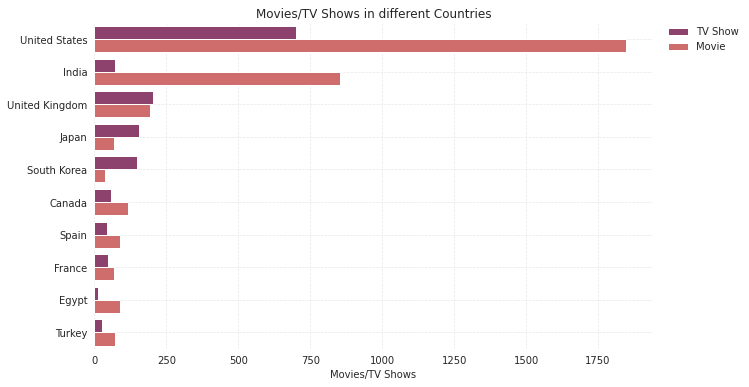

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Plotting the count plot
ax=sns.countplot(y='country',hue="type",data=df,
                 order = df['country'].value_counts().index[:10],
                 palette='flare_r')



# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=True, labelbottom=True)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Movies/TV Shows", ylabel = "")
plt.title("Movies/TV Shows in different Countries")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.show()

> Tv shows are produced in large in United Kingdom,Japan ,South Korea.

> Movies are produced in large in United States,India,Canada,Spain,France,Egypt and Turkey.

Next step after EDA is to make an unsupervised model to perform clustering of contents availabale on Netflix by matching text based features.

#**Feature Engineering**

#Text Pre-processing

Text pre-processing is the process of preparing text data so that machines can use the same to perform tasks like analysis, predictions, etc. There are different steps in text pre-processing like - removing stopwords and punctuations , stemming of words etc. Let us start the preprocessing task.



I) **Removing Punctuations**:-
We need to carefully choose the list of punctuation which we are going to discard based on the use case.To remove punctuation let's create a function and apply them on our both variables

In [ ]:
# import important libraries for text preprocessing
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
from nltk.parse import transitionparser
def remove_punctuation(text):
  ''' a function for removing punctuation'''
  import string
  # replacing the punctuations with no space
  # which in effect deletes the punctuation markes
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation markes 
  return text.translate(translator)

In [ ]:
# Applying the function to remove punctuations
df['description'] = df['description'].apply(remove_punctuation)

# Applying the function to remove punctuations
df['listed_in'] = df['listed_in'].apply(remove_punctuation)

II) **Remove Stopwords**
With english, among many popular languages, stop words are common words within sentences that do not add value and thus can be eliminated when cleaning for NLP prior to analysis.We will make good use of the NLTK library by importing the pre-programmed english stop words library.

In [ ]:
#importing natural language tool kit
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

# extracting the stopwords from nltk library
sw = stopwords.words('english')

# Function to remove stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# appling stopword function
df['description']= df['description'].apply(stopwords)

# Appling the stopword function
df['listed_in'] = df['listed_in'].apply( stopwords)

**III) Let's do stemming of words**

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

Here we are using the "SnowballStemmer" algorithm. It is a better version of the Porter Stemmer.

In [ ]:
# create an object of stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#stemming for description
df['description'] = df['description'].apply(stemming)

**IV). Create New Variables for Text Length**

The text length is very likely to influence any kind of similarity score. In general:

String containing very few words will have their highest similarity scores with other short strings with which they share one or two words in common. However if the words they contain are not common at all, they will have a lot of zero similarity scores (possibly only zeros). Long strings (i.e. with many words) usually have low similarity scores, simply because they are unlikely to have a high proportion of their words in common. However compared to short strings they rarely have no word in common so they are much less likely to have lots of zero similarity scores. As a result strings of similar length may tend to cluster together, depending on the data.

In [ ]:
# Create a function to display text length
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
# Create two variables for description and listed-in texts length respectively
df['desc_length'] = df['description'].apply(length)
df['listed_length'] = df['listed_in'].apply(length)

In [ ]:
# Create a dataframe with variables indicating text lengths only
cluster_df=df.filter(['desc_length','listed_length'],axis=1)
cluster_df.head(2)

,desc_length,listed_length
0,82,49
1,88,27


**Rescaling Data**

We have seen time to time that generatlization of values is an important step before applying any model. Hence, we opt for standard scaler method for scaling values.

In [ ]:
# Standardizing value to generalise
X_features_rec_mon=df[['desc_length','listed_length']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

Now the test is pre-processed and ready to apply alogorithms.

#**K-Means clustering**

**K-means clustering** uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.Let's go ahead and import important tools to apply K-mean clustering

In [ ]:
#import libraries for implementation
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

To implement K-means algorithm one must know the appropriate numbers of clusters.For that Elbow method is used.

**Finding Optimum Numbers of Clusters using Elbow Method**


---


The elbow method runs k-means clustering on the dataset for a range of values of k (say 1 to 10).

Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points. Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

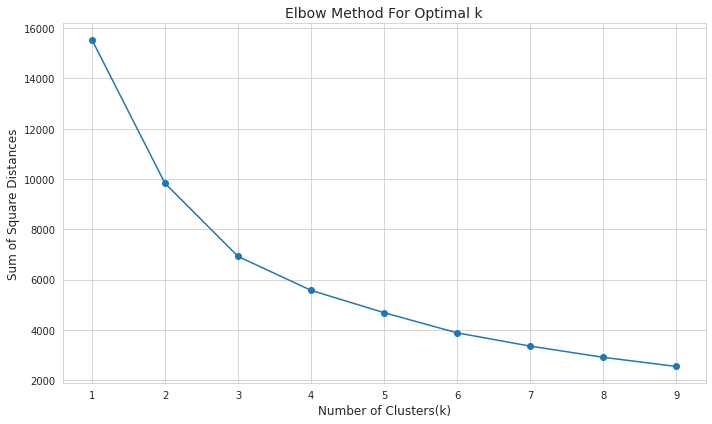

In [ ]:
# Create a list
list_1 = []

# for loop to append kmeans inertia values
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    list_1.append(kmeans.inertia_)

#Plot linegraph
plt.figure(figsize=(10,6))

plt.plot(range(1,10),list_1,"-o")
plt.grid(True)
plt.xlabel("Number of Clusters(k)",fontsize=12)
plt.ylabel("Sum of Square Distances",fontsize=12)
plt.title("Elbow Method For Optimal k",fontsize=14)
plt.xticks(range(1,10))
plt.tight_layout()

In the above plot, the elbow is at k=3, indicating the optimal k for this dataset is 3. Let us visualise our data for different values of clusters , say 2,3,4,5,6,7, for better understanding.

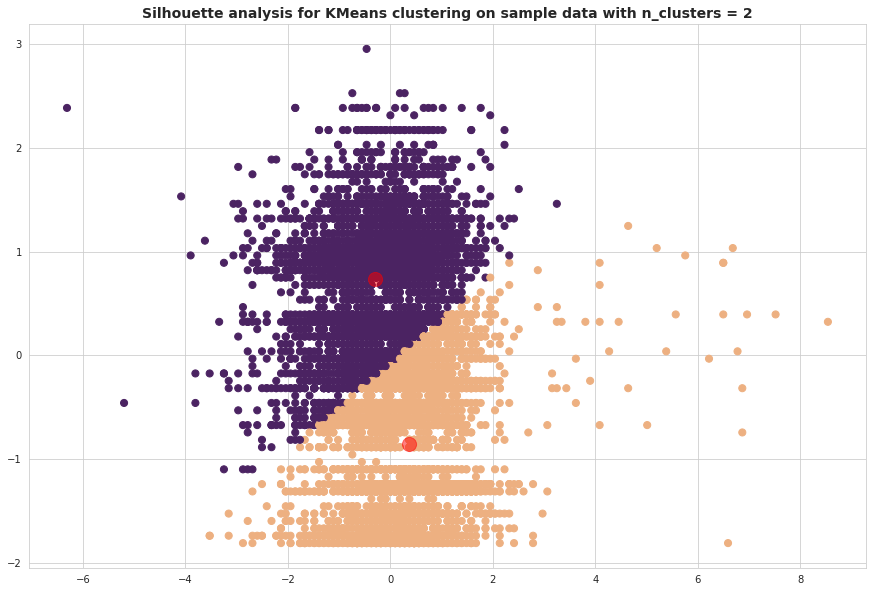

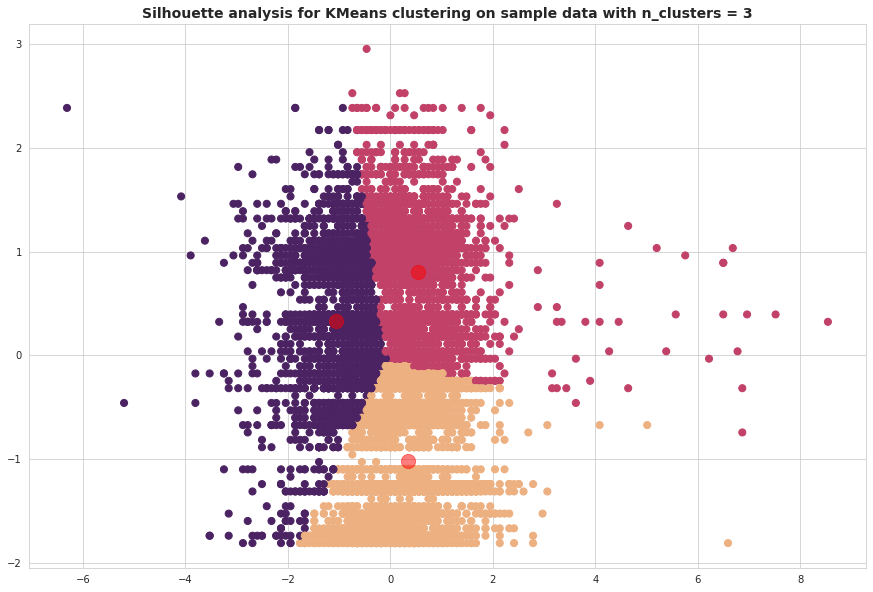

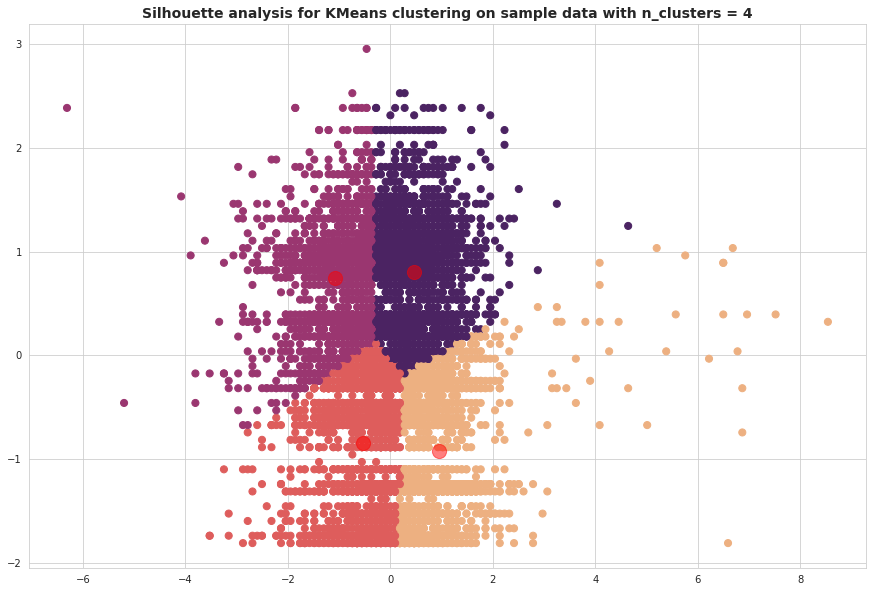

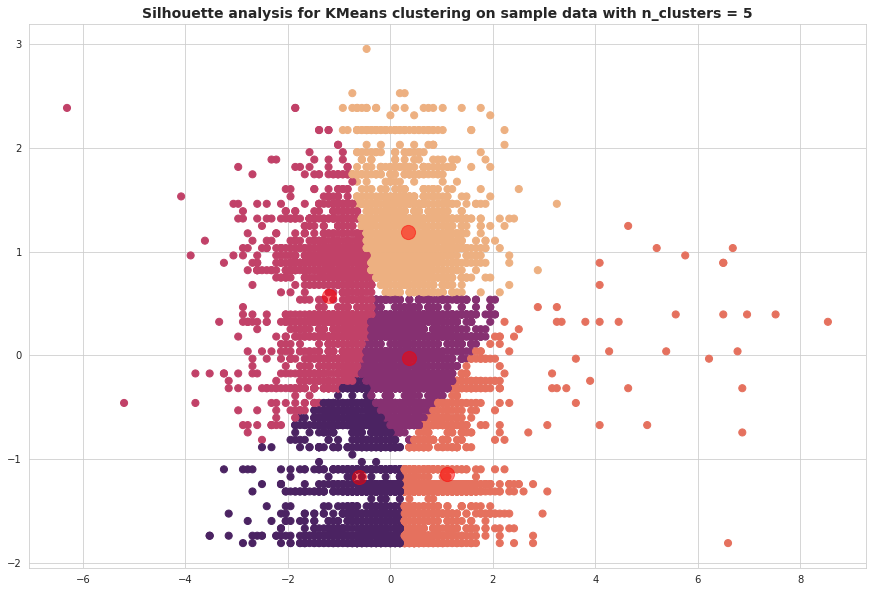

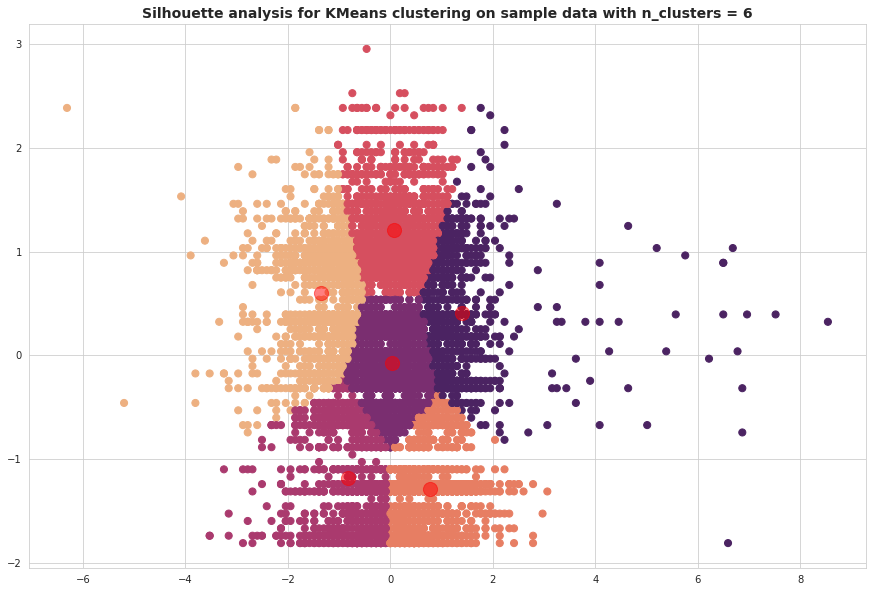

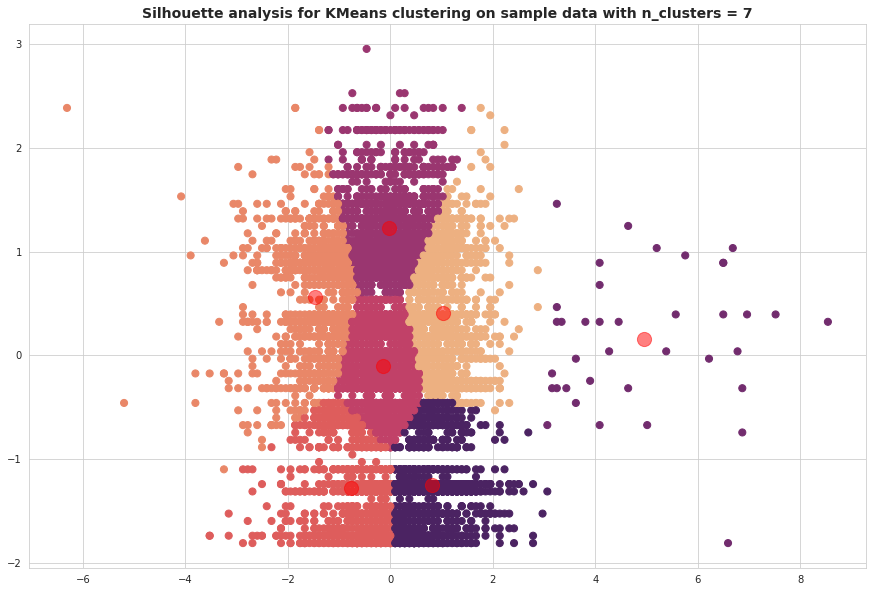

In [ ]:
v=2
for i in (2,3,4,5,6,7):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  y_kmeans= kmeans.predict(X)
  plt.figure(figsize=(15,10))
  n =v+1
  #plt.title('description and listed_in for clusters')
  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='flare')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % i),
                 fontsize=14, fontweight='bold')

# **Let's see the Silhouette scores of different clusters**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

    

*   Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
*    Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.
The Silhouette Coefficient for a sample is  S=(b−a)max(a,b) .

In [52]:
# Calculate silhoutte score for K-means
range_n_clusters = [2,3,4,5,6,7]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("\nFor n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.3549791229399875

For n_clusters = 3, silhouette score is 0.3546695420171219

For n_clusters = 4, silhouette score is 0.32870652771578573

For n_clusters = 5, silhouette score is 0.33495306793511553

For n_clusters = 6, silhouette score is 0.35652887716837933

For n_clusters = 7, silhouette score is 0.3551755787041289
